# Import the libraries

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

# Creating a dataframe

In [16]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Slicing the dataset into input and output

In [17]:
x = df.drop(['diagnosis'], axis=1)
y = df.iloc[:, 1]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# Splitting the dataset for training and testing

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Standardization of dataset

In [19]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)

In [20]:
x_test_std = scaler.transform(x_test)

# Fitting the model


In [21]:
model = GaussianNB()
model.fit(x_train_std, y_train)

GaussianNB()

# Printing model score for testing and training data

In [22]:
print(model.score(x_train_std, y_train))

0.9422110552763819


In [23]:
print(model.score(x_test_std, y_test))

0.9122807017543859


# plotting Confusion Matrix

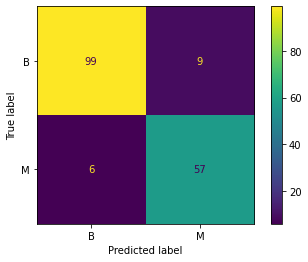

In [24]:
import matplotlib.pyplot as plt
predictions = model.predict(x_test_std)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

# PCA analysis

In [84]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(0.95)


In [85]:
pca.fit(x_train_std)

PCA(n_components=0.95)

In [86]:
train_x = pca.transform(x_train_std)
test_x = pca.transform(x_test_std)

In [87]:
model = GaussianNB()
model.fit(train_x, y_train)

GaussianNB()

In [88]:
model.score(train_x, y_train)

0.9246231155778895

In [89]:
model.score(test_x, y_test)

0.9122807017543859